In [78]:
import pandas as pd
pd.set_option('display.max_columns', None)
from plotnine import *


In [79]:
df = pd.read_excel('US_ImVisa_continent.xlsx')

In [80]:
df

,Year,Africa,Asia,Europe,South America,Oceania,North America
0,2020,27638,105357,21196,11876,1067,73392
1,2019,59191,185464,41273,27574,1617,147303
2,2018,62804,190840,44417,33920,1937,199639
3,2017,62605,214529,43665,30242,1766,206729
4,2016,67332,249312,43282,33075,1827,222924
5,2015,52083,210794,45081,31689,2232,189584
6,2014,52999,194976,38686,26834,1787,152088
7,2013,58315,184011,39966,30173,1983,158667
8,2012,52458,195031,35633,28935,1707,168536
9,2011,52371,188981,39937,30161,1891,162908


In [81]:
df = pd.read_excel("US_visa_transposed.xlsx")

In [82]:
df.head()

,Year,Immigrants,Continents
0,2020,27638,Africa
1,2019,59191,Africa
2,2018,62804,Africa
3,2017,62605,Africa
4,2016,67332,Africa


In [86]:
df.groupby(['Year', 'Continents']).Immigrants.sum().to_frame()

Immigrants
Year Continents               
2010 Africa              53152
     Asia               350436
     Europe              39357
     North America      166151
     Oceania              2152
...                        ...
2020 Asia               105357
     Europe              21196
     North America       73392
     Oceania              1067
     South America       11876

[66 rows x 1 columns]

## I decided to read in a version of the dataset that has approvals by country to have an idea which countries are taking the highest figures

In [15]:
df2= pd.read_excel('visaCountry.xlsx')

In [16]:
df2

,Country,Total,Year
0,Algeria,1056.0,2010
1,Angola,30.0,2010
2,Benin,259.0,2010
3,Botswana,13.0,2010
4,Burkina Faso,154.0,2010
...,...,...,...
2549,Paraguay,41.0,2020
2550,Peru,1934.0,2020
2551,Suriname,52.0,2020
2552,Uruguay,70.0,2020


In [17]:
df2.groupby(['Country', 'Year']).Total.sum().to_frame().reset_index().sort_values('Total').tail(10)

,Country,Year,Total
1443,Mexico,2019,54545.0
1438,Mexico,2014,61520.0
1437,Mexico,2013,64498.0
1434,Mexico,2010,65621.0
1435,Mexico,2011,69532.0
1442,Mexico,2018,74901.0
1436,Mexico,2012,76406.0
1439,Mexico,2015,82476.0
1441,Mexico,2017,84045.0
1440,Mexico,2016,89234.0


In [18]:
top = df2.groupby(['Country']).Total.sum().to_frame().reset_index().sort_values('Total').tail(10)


In [19]:
# pres_g_dem.groupby(['year','pollster']).error.mean().to_frame().reset_index().sort_values('error')

# top.to_csv('top_countries.csv')
top

,Country,Total
107,Jamaica,123407.0
65,El Salvador,127223.0
17,Bangladesh,142463.0
94,Haiti,146005.0
100,India,282087.0
244,Vietnam,297513.0
173,Philippines,347873.0
45,China,363986.0
62,Dominican Republic,437519.0
139,Mexico,751906.0


In [20]:
total = top.Total.sum() 
hispanic = top[(top.Country == 'El Salvador') + (top.Country == 'Dominican Republic') + (top.Country == 'Mexico')].Total.sum()

In [21]:
hispanic/total * 100

43.5978757489283

## The data shows that Hispanic groups are the top immigrants (El Salvador, Dominican Republic and Mexico)in the last 10 years
## Immigrant visas to the three countries make up almost half (44 per cent ) of top highest approvals

In [105]:
top.to_csv('top_countries.csv')

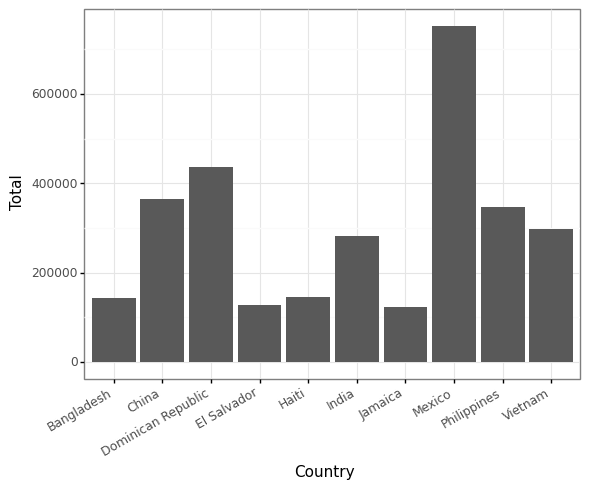

<ggplot: (675476610)>

In [22]:
(
    ggplot(top)
    + aes(x='Country', y='Total')
    + geom_col()
    + theme_bw()
    + theme(axis_text_x=element_text(angle=30, hjust=1))
)


In [100]:
# According to the Bureau of Statistics https://www.bls.gov/news.release/empsit.t01.html

# The US civilian labor force is about 162,825

# Clearly, Hispanic countries have the highest immigration visa approvals in the last 10 years

# Why is the US attracting them with visas and what percentage of the labor force is made up of Hispanics?

labor_ethnic = pd.read_excel('labour_ethnicity_2020.xlsx')
labor_ethnic





,Occupation,Hispanics,White,Black,Asian
0,"Management, professional, and related occupations",6615,50108,6203,5494
1,Service occupations,5709,16669,3884,1291
2,Sales and office occupations,5132,23404,3729,1508
3,"Production, transportation, and material movin...",4336,13586,3050,866
4,"Natural resources, construction, and maintenan...",4160,11574,1006,278
5,Professional and related occupations,3669,27930,3817,3674
6,"Management, business, and financial operations...",2946,22178,2386,1820
7,Construction and extraction occupations,2752,6766,540,121
8,Office and administrative support occupations,2709,12042,2231,728
9,Transportation and material moving occupations,2544,7683,2057,443


In [102]:
top_field = labor_ethnic.iloc[[1, 2, 4, 7, 9, 10, 12, 13, 14, 23, ]]

In [104]:
top_field.to_csv('topfield.csv')

In [87]:
labor_ethnic.describe().round(1)

,Hispanics,White,Black,Asian
count,29.0,29.0,29.0,29.0
mean,2017.9,9682.4,1446.4,840.3
std,1793.2,10559.3,1457.7,1163.5
min,138.0,941.0,45.0,17.0
25%,480.0,2494.0,508.0,180.0
50%,1789.0,6689.0,914.0,431.0
75%,2752.0,12042.0,2057.0,897.0
max,6615.0,50108.0,6203.0,5494.0


In [ ]:
# What is the percentage of Hispanics, White, Black and Asian in the US? I want to use this to determine
# the proportion of representation within each industry



In [72]:
# All figures in thousands.

labor_ethnic.groupby(['Occupation', 'Hispanics']).head()

,Occupation,Hispanics,White,Black,Asian
0,"Management, professional, and related occupations",6615,50108,6203,5494
1,Service occupations,5709,16669,3884,1291
2,Sales and office occupations,5132,23404,3729,1508
3,"Production, transportation, and material movin...",4336,13586,3050,866
4,"Natural resources, construction, and maintenan...",4160,11574,1006,278
5,Professional and related occupations,3669,27930,3817,3674
6,"Management, business, and financial operations...",2946,22178,2386,1820
7,Construction and extraction occupations,2752,6766,540,121
8,Office and administrative support occupations,2709,12042,2231,728
9,Transportation and material moving occupations,2544,7683,2057,443


In [ ]:
#The race make up 

In [ ]:
# Employed people by occupation, race, and Hispanic or Latino ethnicity, 2020 annual averages

In [1]:
#Note: People whose ethnicity is identified as Hispanic or Latino may be of any race. Data may not sum to 100 percent because of rounding.				
# Source: U.S. Bureau of Labor Statistics, Current Population Survey (CPS).				

In [ ]:
(
    ggplot(df_labor)
    + aes(x='race', y='Total')
    + geom_col()
    + theme_bw()
    + theme(axis_text_x=element_text(angle=30, hjust=1))
)

In [152]:
import requests
import json
from pandas import json_normalize

In [153]:
with open('custom.geo.json') as json_data:
    geometry_data = json.load(json_data)

In [155]:
geo = pd.DataFrame.from_dict(json_normalize(geometry_data['features']),orient='columns')

In [167]:
geo = pd.merge(df2, geo, how="left", left_on="Country", right_on="properties.sovereignt")


In [170]:
geo.head(2)

,Country,Total,Year,type,properties.scalerank,properties.featurecla,properties.labelrank,properties.sovereignt,properties.sov_a3,properties.adm0_dif,properties.level,properties.type,properties.admin,properties.adm0_a3,properties.geou_dif,properties.geounit,properties.gu_a3,properties.su_dif,properties.subunit,properties.su_a3,properties.brk_diff,properties.name,properties.name_long,properties.brk_a3,properties.brk_name,properties.brk_group,properties.abbrev,properties.postal,properties.formal_en,properties.formal_fr,properties.note_adm0,properties.note_brk,properties.name_sort,properties.name_alt,properties.mapcolor7,properties.mapcolor8,properties.mapcolor9,properties.mapcolor13,properties.pop_est,properties.gdp_md_est,properties.pop_year,properties.lastcensus,properties.gdp_year,properties.economy,properties.income_grp,properties.wikipedia,properties.fips_10,properties.iso_a2,properties.iso_a3,properties.iso_n3,properties.un_a3,properties.wb_a2,properties.wb_a3,properties.woe_id,properties.adm0_a3_is,properties.adm0_a3_us,properties.adm0_a3_un,properties.adm0_a3_wb,properties.continent,properties.region_un,properties.subregion,properties.region_wb,properties.name_len,properties.long_len,properties.abbrev_len,properties.tiny,properties.homepart,properties.filename,geometry.type,geometry.coordinates
0,Algeria,1056.0,2010,Feature,1.0,Admin-0 country,3.0,Algeria,DZA,0.0,2.0,Sovereign country,Algeria,DZA,0.0,Algeria,DZA,0.0,Algeria,DZA,0.0,Algeria,Algeria,DZA,Algeria,None,Alg.,DZ,People's Democratic Republic of Algeria,None,None,None,Algeria,None,5.0,1.0,6.0,3.0,34178188.0,232900.0,-99.0,2008.0,-99.0,6. Developing region,3. Upper middle income,-99.0,None,DZ,DZA,012,012,DZ,DZA,-99.0,DZA,DZA,-99.0,-99.0,Africa,Africa,Northern Africa,Middle East & North Africa,7.0,7.0,4.0,-99.0,1.0,DZA.geojson,Polygon,"[[[11.999505649471613, 23.47166840259645], [8...."
1,Angola,30.0,2010,Feature,1.0,Admin-0 country,3.0,Angola,AGO,0.0,2.0,Sovereign country,Angola,AGO,0.0,Angola,AGO,0.0,Angola,AGO,0.0,Angola,Angola,AGO,Angola,None,Ang.,AO,People's Republic of Angola,None,None,None,Angola,None,3.0,2.0,6.0,1.0,12799293.0,110300.0,-99.0,1970.0,-99.0,7. Least developed region,3. Upper middle income,-99.0,None,AO,AGO,024,024,AO,AGO,-99.0,AGO,AGO,-99.0,-99.0,Africa,Africa,Middle Africa,Sub-Saharan Africa,6.0,6.0,4.0,-99.0,1.0,AGO.geojson,MultiPolygon,"[[[[16.326528354567046, -5.877470391466218], [..."


In [174]:
geo = geo[['Country', 'Total', 'Year', 'geometry.coordinates']]

In [176]:
geo.to_csv('country_geo.csv')

In [ ]:
# Footnotes:
# (1) The "all other groups" category includes (1) those classified as being of multiple racial origin and (2) the racial categories of (2a) Asian (2b) American Indian and Alaska Native and (2c) Native Hawaiian and Other Pacific Islanders. 	
# Note: Details may not sum to totals because of rounding. Historic data may not match BLS Current Populations Survey (CPS) data due to rounding at different aggregate levels.
# Source: Employment Projections program, U.S. Bureau of Labor Statistics